In [2]:
from time import perf_counter

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Model, Sequential
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense, InputLayer
from tensorflow.python.keras.metrics import mean_squared_error
from tensorflow.python.keras.optimizers import gradient_descent_v2

from dataset.create_dataset import create_dataset


In [3]:
# X1, Y1 = create_dataset(nb=100)
# X2, Y2 = create_dataset(nb=100)
# X3, Y3 = create_dataset(nb=100)

# X, Y = pd.concat([X1, X2, X3]), pd.concat([Y1, Y2, Y3])

data = pd.read_csv('dataset/dataset0.csv')
X, Y = data['X'], data['Y']

# X, Y = create_dataset(1000)

# X = np.linspace(0, 10, 100)
# Y = X + np.random.normal(0,1,100)

In [4]:
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, train_size=0.8)

# x_train = X[:-1]
# y_train = Y[:-1]
# x_test = X[-1:]
# y_test = Y[-1:]

In [5]:
model: Model = Sequential([
    InputLayer(input_shape=(1,)),
    Dense(1)
])

model.compile(
    optimizer=gradient_descent_v2.SGD(learning_rate=0.1),
    loss='mean_squared_error',)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
tstart = perf_counter()

history = model.fit(
    x_train,
    y_train,
    epochs=500,
    validation_split = 0.2,
    callbacks=[EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)]
    )

print(f'\n\nexecution time: {perf_counter() - tstart}')

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 3444.9502 - val_loss: 5952.1211
Epoch 2/500
1/1 [==============================] - 0s 25ms/step - loss: 2313.7153 - val_loss: 6095.5342
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 1651.4232 - val_loss: 6104.1553
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 1255.2163 - val_loss: 6014.0098
Epoch 5/500
1/1 [==============================] - 0s 26ms/step - loss: 1010.5743 - val_loss: 5854.3691
Epoch 6/500
1/1 [==============================] - 0s 25ms/step - loss: 852.8073 - val_loss: 5648.0708
Epoch 7/500
1/1 [==============================] - 0s 25ms/step - loss: 745.3376 - val_loss: 5412.4272
Epoch 8/500
1/1 [==============================] - 0s 28ms/step - loss: 667.4494 - val_loss: 5160.2651
Epoch 9/500
1/1 [==============================] - 0s 25ms/step - loss: 607.3787 - val_loss: 4900.8999
Epoch 10/500
1/1 [==============================] - 0s 25ms/step - los

In [7]:
x_lin = tf.linspace(min(x_train), max(x_train), len(X))
y_lin = model.predict(x_lin)

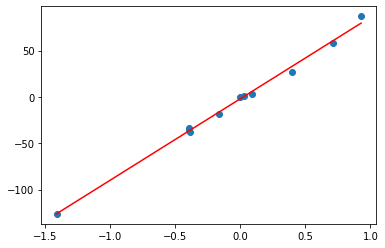

In [8]:
plt.scatter(X, Y)
plt.plot(x_lin, y_lin, color='red')
plt.show()

In [9]:
model.get_weights()

[array([[87.91022]], dtype=float32), array([-2.085223], dtype=float32)]

In [10]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 21ms/step - loss: 17.5278


17.5278263092041

In [11]:
y_pred = model.predict(x_test)

In [12]:
mean_squared_error(
    pd.DataFrame(y_test), pd.DataFrame(y_pred)
)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([38.02036 ,  4.348155, 10.214962], dtype=float32)>

In [27]:
data = pd.read_csv(f'dataset/dataset1.csv')
x_eval = data['X']
y_eval = data['Y']

model.evaluate(x_eval, y_eval, return_dict = True)

1/1 [==============================] - 0s 20ms/step - loss: 8.7220


{'loss': 8.722023010253906}

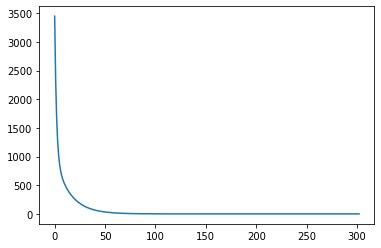

In [14]:
plt.plot(history.history['loss'])

In [15]:
model.predict([1.474998454872067])

array([[127.582214]], dtype=float32)

In [22]:
data = model.get_weights()
data

[array([[87.91022]], dtype=float32), array([-2.085223], dtype=float32)]